<a href="https://colab.research.google.com/github/coulibalyIsmael/deep_learning/blob/main/pytorch_chap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [4]:
torch.__version__

'2.6.0+cu124'

In [5]:
print(torch.cuda.is_available())

True


In [6]:
import urllib.request
url = 'https://pytorch.tips/coffee'
fpath = 'coffe.jpg'
urllib.request.urlretrieve(url, fpath)

('coffe.jpg', <http.client.HTTPMessage at 0x7bf75819a2d0>)

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
img = Image.open(fpath)

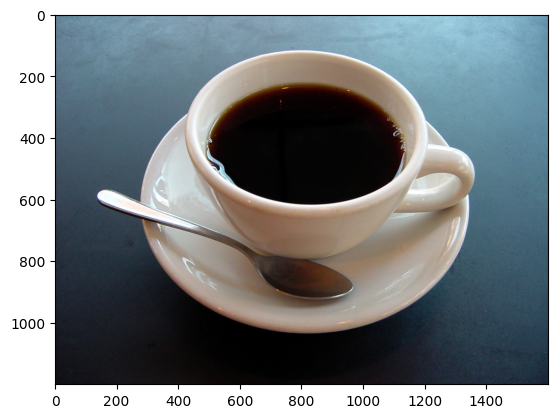

In [9]:
plt.imshow(img)

In [10]:
import torch
from torchvision import transforms

In [11]:
transform  = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
img_tensor = transform(img)

In [12]:
print(f'img_tensor shape: {img_tensor.shape}')
batch = img_tensor.unsqueeze(0)
print(f'batch shape: {batch.shape}')

img_tensor shape: torch.Size([3, 224, 224])
batch shape: torch.Size([1, 3, 224, 224])


In [13]:
from torchvision import models
model = models.alexnet(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 170MB/s]


In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)

torch.Size([1, 1000])


In [15]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [16]:
y_max, index = torch.max(y, 1)
print(index, y_max)

tensor([967], device='cuda:0') tensor([22.8618], device='cuda:0', grad_fn=<MaxBackward0>)


In [17]:
labels_url = 'https://pytorch.tips/imagenet-labels'
labels_fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(labels_url, labels_fpath)
with open(labels_fpath) as f:
  classes = [line.strip() for line in f.readlines()]
  print(classes[index])

967: 'espresso',


In [18]:
prob = torch.nn.functional.softmax(y, dim=1)[0]*100
print(classes[index], prob[index])

967: 'espresso', tensor([87.9955], device='cuda:0', grad_fn=<IndexBackward0>)


In [19]:
_, indices = torch.sort(y, descending=True)

In [22]:
for idx in indices[0][:5]:
  print(classes[idx], prob[idx])

967: 'espresso', tensor(87.9955, device='cuda:0', grad_fn=<SelectBackward0>)
968: 'cup', tensor(7.6889, device='cuda:0', grad_fn=<SelectBackward0>)
504: 'coffee mug', tensor(3.8616, device='cuda:0', grad_fn=<SelectBackward0>)
925: 'consomme', tensor(0.3513, device='cuda:0', grad_fn=<SelectBackward0>)
960: 'chocolate sauce, chocolate syrup', tensor(0.0501, device='cuda:0', grad_fn=<SelectBackward0>)


In [23]:
device = "cuda" if torch.cuda.is_available else "cpu"

In [5]:
x = torch.tensor([[1, 2, 3],[4,5 , 6]], dtype=torch.int32)

In [26]:
x

tensor([[1, 2, 3],
        [4, 5, 6]], device='cuda:0', dtype=torch.int16)

In [27]:
import numpy as np
w = torch.tensor(np.array([1, 2, 3]))

In [28]:
w

tensor([1, 2, 3])

In [6]:
x = torch.tensor([[1,2],[3,4],[5,6],[7,8]])


In [8]:
x.shape

torch.Size([4, 2])

In [10]:
x.t()

tensor([[1, 3, 5, 7],
        [2, 4, 6, 8]])

In [11]:
print(x.view(2,4))

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


In [16]:
x = torch.tensor([[1,2,3],[4,5,6]],
dtype=torch.float, requires_grad=True)
print(x)
f = x.pow(2).sum()
print(f)


tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
tensor(91., grad_fn=<SumBackward0>)


tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

In [17]:
f.backward()
print(x.grad)

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])


In [1]:
# grad
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [10]:
Q = 3*a.pow(3)  - b.pow(2                 )
print(Q)
Q.sum().backward()
print(Q)


tensor([-12.,  65.], grad_fn=<SubBackward0>)
tensor([-12.,  65.], grad_fn=<SubBackward0>)


In [13]:
print(a.grad)
print(b.grad)


tensor([36., 81.])
tensor([-12.,  -8.])
